In [1]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras import Model
from skimage import util

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
inputs = Input((256, 256, 4))

#Encoder (Contraction patch)

#3x3 convolution kernel that will be concatenated with its symmetrically
#equivalent component in the decoder portion
#ReLu (Rectified Linear Unit): x<0 -> 0, x>0 -> x
s1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
s1 = Conv2D(64, 3, activation='relu', padding='same')(s1)
#Applying 2x2 kernel to the image, resulting in a half sized output that serves as
#the input to the next layer convolution layer
p1 = MaxPooling2D(pool_size=(2, 2))(s1)

s2 = Conv2D(128, 3, activation='relu', padding='same')(p1)
s2 = Conv2D(128, 3, activation='relu', padding='same')(s2)
p2 = MaxPooling2D(pool_size=(2, 2))(s2)

s3 = Conv2D(256, 3, activation='relu', padding='same')(p2)
s3 = Conv2D(256, 3, activation='relu', padding='same')(s3)
p3 = MaxPooling2D(pool_size=(2, 2))(s3)

s4 = Conv2D(512, 3, activation='relu', padding='same')(p3)
s4 = Conv2D(512, 3, activation='relu', padding='same')(s4)
p4 = MaxPooling2D(pool_size=(2, 2))(s4)

b1 = Conv2D(1024, 3, activation='relu', padding='same')(p4)
b1 = Conv2D(1024, 3, activation='relu', padding='same')(b1)

In [4]:
#Decoder (Expansion patch)

#UpSampling goes from a lower dimension to a higher dimension by copying and doubling rows and columns
d1 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(b1))
#Concatenation adds the previous filters of the same size, doubling the number of features during up-convolution
d1 = concatenate([s4, d1], axis=3)
d1 = Conv2D(512, 3, activation='relu', padding='same')(d1)
d1 = Conv2D(512, 3, activation='relu', padding='same')(d1)

d2 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(d1))
d2 = concatenate([s3, d2], axis=3)
d2 = Conv2D(256, 3, activation='relu', padding='same')(d2)
d2 = Conv2D(256, 3, activation='relu', padding='same')(d2)

d3 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(d2))
d3 = concatenate([s2, d3], axis=3)
d3 = Conv2D(128, 3, activation='relu', padding='same')(d3)
d3 = Conv2D(128, 3, activation='relu', padding='same')(d3)

d4 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(d3))
d4 = concatenate([s1, d4], axis=3)
d4 = Conv2D(64, 3, activation='relu', padding='same')(d4)
d4 = Conv2D(64, 3, activation='relu', padding='same')(d4)
d4 = Conv2D(2, 3, activation='relu', padding='same')(d4)
out = Conv2D(1, 1, activation='sigmoid')(d4)

In [5]:
x = imread('/content/gdrive/MyDrive/EDI Prakse/CNNMacibuUzdevumi/RGBNIRforTraining.tif')
x[x<0] = 0
x[x>2400] = 2400
x = x / 2400.0
y = imread('/content/gdrive/MyDrive/EDI Prakse/CNNMacibuUzdevumi/chmProportionUTM34N.tif')
y[y<0] = 0

x_patches = util.view_as_windows(x, window_shape = (256, 256, x.shape[2]), step = 256)
y_patches = util.view_as_windows(y, window_shape = (256, 256), step = 256)

x_patches = x_patches.reshape(-1, 256, 256, x.shape[2])
y_patches = y_patches.reshape(-1, 256, 256, 1)

In [6]:
model = Model(inputs = inputs, outputs = out)
model.compile(optimizer = 'adam', loss = 'MSE')
model.fit(x_patches, y_patches, epochs = 30)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 169s 13s/step - loss: 0.2012
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.1870
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1712
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1738
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1624
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.1582
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1457
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1354
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1196
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.1190
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1178
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.1152
Epoch 13/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1112
Epoch 14/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1072
Epoch 15/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.1058
Epoch 16/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - l

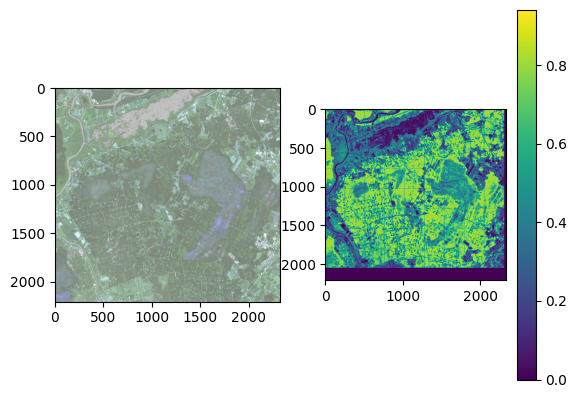

In [10]:
test = imread('/content/gdrive/MyDrive/EDI Prakse/CNNMacibuUzdevumi/RGBNIRforTesting.tif')
test[test<0] = 0
test[test>2400] = 2400
test = test / 2400.0
result = np.zeros((test.shape[0], test.shape[1]))
for i in range(0, test.shape[0]-256, 256):
  for j in range(0, test.shape[1]-256, 256):
    patch = test[i:i+256, j:j+256, :]
    patch = np.expand_dims(patch, axis = 0)
    pred = model.predict(patch, verbose=0)
    result[i:i+256, j:j+256] = pred[0,:,:,0]
plt.subplot(121)
plt.imshow(test)
plt.subplot(122)
plt.imshow(result)
plt.colorbar()
plt.show()